# EDA AdventuresWorks


Este es un EDA para cuyo fin es demostrar las skills del autor.

Los objetivos seran:
- Identificar los productos más y menos vendidos por Internet
- Analizar la relación entre atributos del producto y su desempeño en ventas
- Analizar la evolución de las ventas online en el tiempo
- Segmentar los productos en función de su rentabilidad
- Detectar productos con alto inventario y baja venta

Los datos de este EDA fueron obtenidos desde https://learn.microsoft.com/en-us/sql/samples/adventureworks-install-configure?view=sql-server-ver16&tabs=ssms

### Carga de las librerias a utilizar

In [69]:
import pandas as pd
import numpy as np
import pyodbc
import sqlalchemy
import os
from dotenv import load_dotenv
import matplotlib.pyplot as plt
import seaborn as sns

### Conexion a BD

In [2]:
# Cargar las variables del .env
load_dotenv()

server = os.getenv('DB_SERVER')
database = os.getenv('DB_DATABASE')
username = os.getenv('DB_USERNAME')
password = os.getenv('DB_PASSWORD')

# Crear la cadena de conexión
connection_string = f"mssql+pyodbc://{username}:{password}@{server}/{database}?driver=ODBC+Driver+17+for+SQL+Server"
engine = sqlalchemy.create_engine(connection_string)



# probar la conexión
try:
    with engine.connect() as connection:
        print("Conexión exitosa a la base de datos.")
except sqlalchemy.exc.OperationalError as e:
    print("Error al conectar a la base de datos:", e)
    exit(1)


Conexión exitosa a la base de datos.


## Analisis 

Se realizara analisis a las tablas de interes: 
- product 
- costumer 
- date
- internetSales
- ProductInventory


In [67]:
query = """
SELECT 
    p.EnglishProductName AS nombre_producto,
    SUM(fis.OrderQuantity) AS total_unidades_vendidas,
    SUM(fis.SalesAmount) AS total_ventas
FROM 
    FactInternetSales AS fis
JOIN 
    DimProduct AS p ON fis.ProductKey = p.ProductKey
GROUP BY 
    p.EnglishProductName
ORDER BY 
    total_unidades_vendidas DESC;
"""
df_InternetSales = pd.read_sql(query, engine)

In [68]:
df_InternetSales.head()

,nombre_producto,total_unidades_vendidas,total_ventas
0,Water Bottle - 30 oz.,4244,21177.56
1,Patch Kit/8 Patches,3191,7307.39
2,Mountain Tire Tube,3095,15444.05
3,Road Tire Tube,2376,9480.24
4,"Sport-100 Helmet, Red",2230,78027.70


C:\Users\alej1\AppData\Local\Temp\ipykernel_53020\1247392346.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10, x='total_unidades_vendidas', y='nombre_producto', palette='Blues_d')


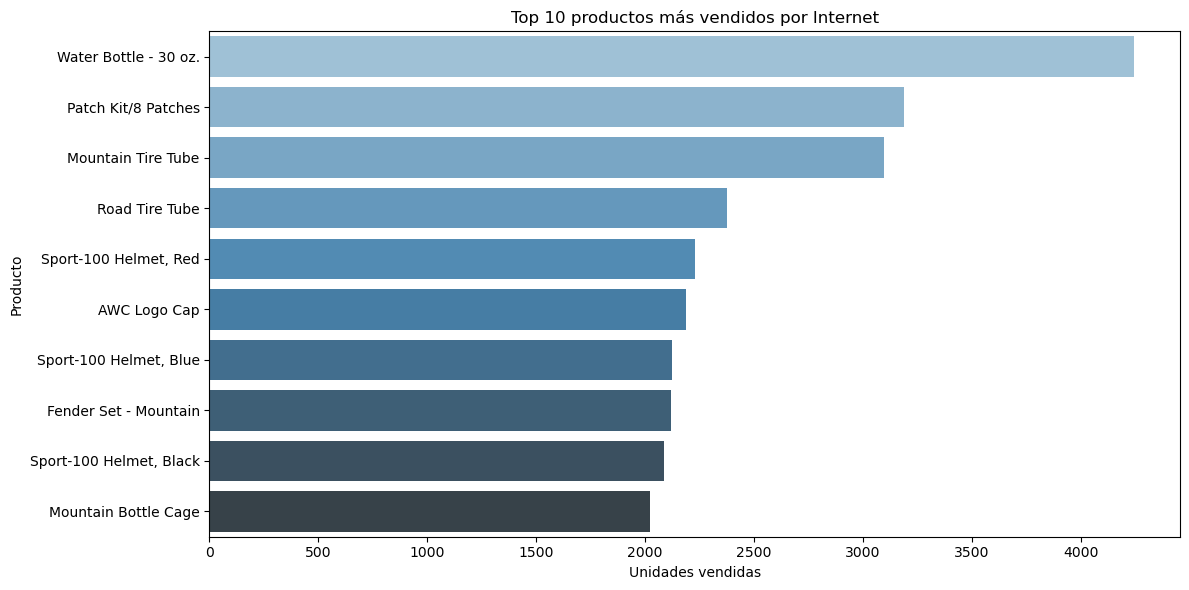

In [70]:
top_10 = df_InternetSales.nlargest(10, 'total_unidades_vendidas')

# Configurar gráfico
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10, x='total_unidades_vendidas', y='nombre_producto', palette='Blues_d')

plt.title('Top 10 productos más vendidos por Internet')
plt.xlabel('Unidades vendidas')
plt.ylabel('Producto')
plt.tight_layout()
plt.show()